In [197]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
milkyway = cv2.imread('COMP9517_22T2_Assignment_Images/Milkyway.PNG',0)
cells = cv2.imread('COMP9517_22T2_Assignment_Images/Cells.PNG',0)

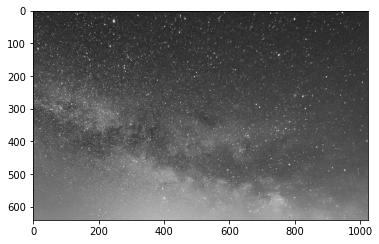

In [49]:
plt.imshow(milkyway,"gray")

In [161]:
def algo_extend(M,img):
    if M == 1:
        M_is_1(img)
    if M == 0:
        M_is_zero(img)

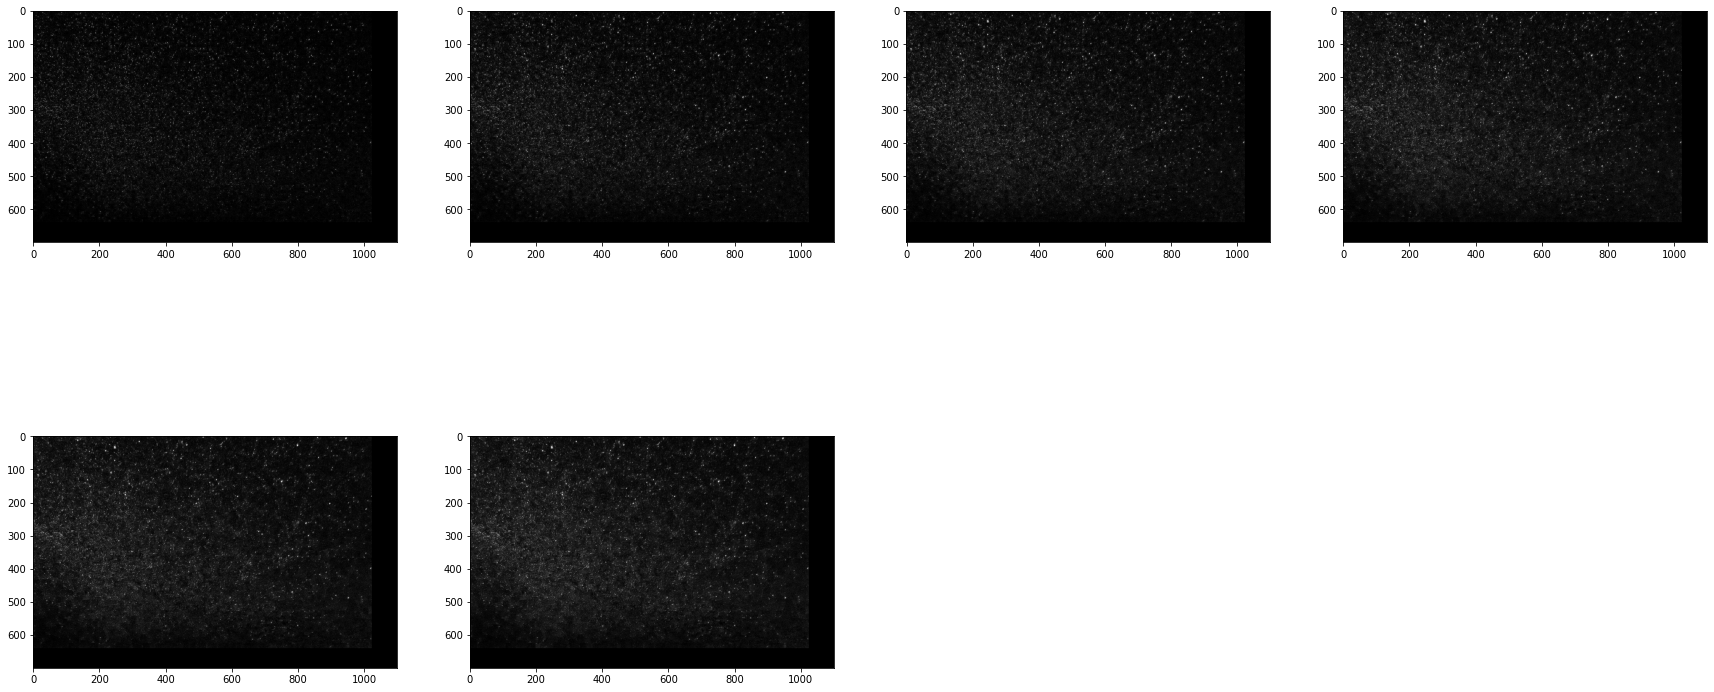

In [176]:
algo_extend(0,milkyway)
#from N =3 to N =13

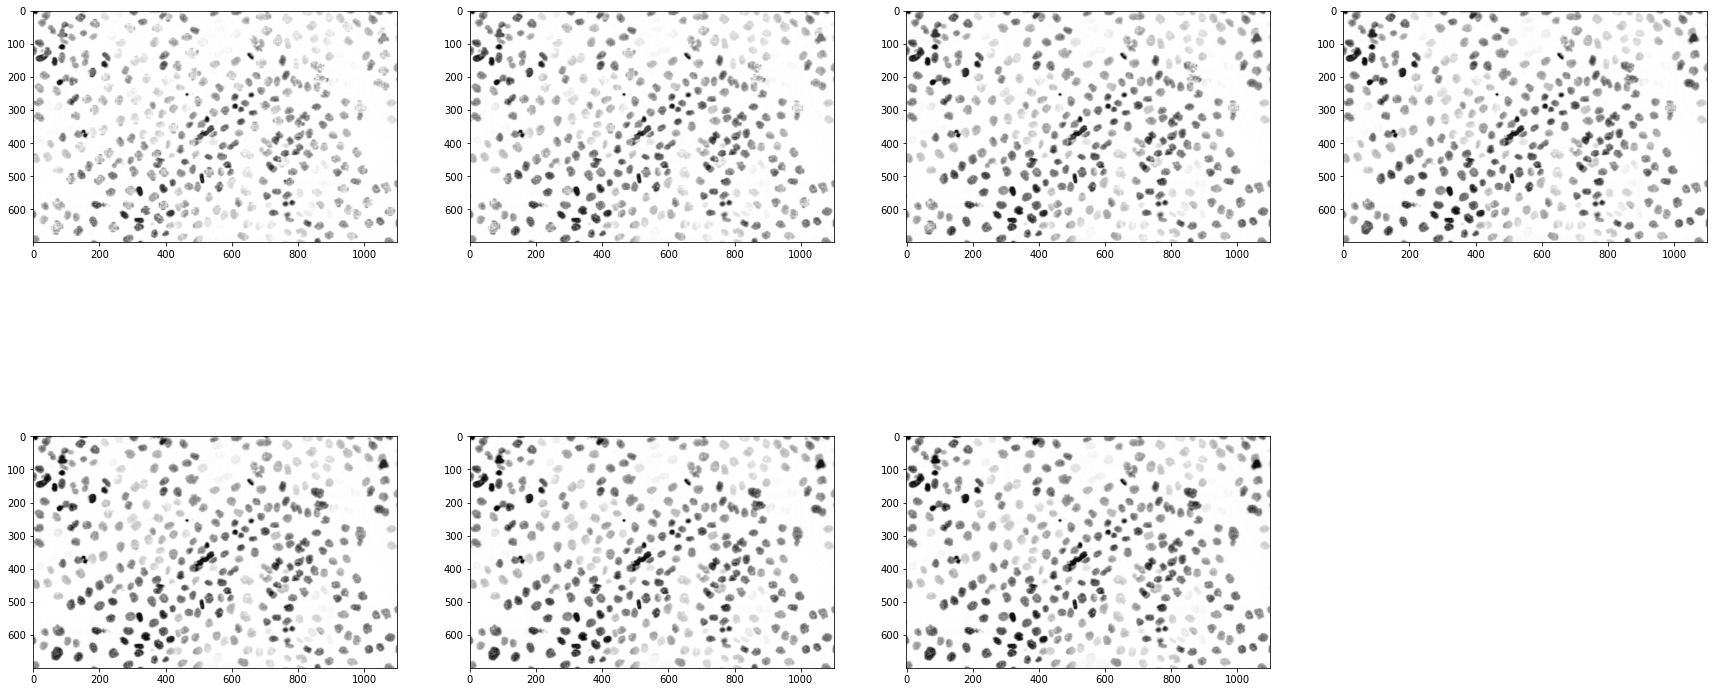

In [174]:
algo_extend(1,cells)
#from N = 19(first_img) to 21, 23, 25, 27, 29, 31(last) result
#loop is deleted ,only change N

In [175]:
def M_is_zero(img):  
    index = 1
    plt.figure(figsize=(30,30))
    height = img.shape[0]
    width = img.shape[1]
    for N in range(3,15,2):
        bw = N//2
        img_padded = add_padding_to_image(img, bw,0)
        img_min = min_filter(N, img_padded)

        img_min_padded = add_padding_to_image(img_min, bw,0)

        img_min_max = max_filter(N, img_min_padded)

        output = np.zeros_like(cells)
        for row in range(height):
            for col in range(width):
                output[row, col] = img[row, col].astype("int32") - img_min_max[row, col].astype("int32")
        plt.subplot(4,4,index)
        output = np.absolute(output).astype("uint8")
        plt.imsave("{}.png".format(N),img_min,cmap="gray")
        plt.imsave("{}background.png".format(N),img_min_max,cmap="gray")
        plt.imsave("{}star.png".format(N), output,cmap="gray")
        plt.imshow(output,"gray")
        index += 1
    plt.show()
    return output

114


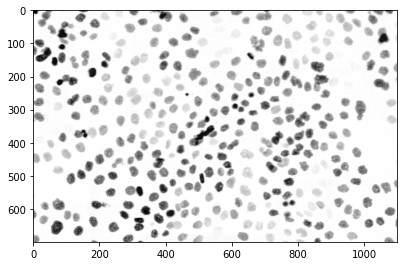

In [196]:
M_is_1(cells)

In [195]:
def M_is_1(img):
    index = 1
    plt.figure(figsize=(30,30))
    height = img.shape[0]
    width = img.shape[1]
    #all the N to find the best one
    #for N in range(19,32,2):
    N = 29
    bw = N//2
    img_padded = add_padding_to_image(img, bw,1)
    img_max = max_filter(N, img_padded)

    img_max_padded = add_padding_to_image(img_max, bw,1)

    img_max_min = min_filter(N, img_max_padded)

    output = np.zeros_like(img)
    for row in range(height):
        for col in range(width):
            output[row, col] = img[row, col].astype("int32") - img_max_min[row, col].astype("int32")
            output[row, col] += 255
    #print(np.min(output))
    plt.subplot(4,4,index)
    output = output.astype("uint8")
    plt.imsave("{}cells_max.png".format(N),img_max,cmap="gray")
    plt.imsave("{}cells_max_min.png".format(N),img_max_min,cmap="gray")
    plt.imsave("{}cells.png".format(N), output,cmap="gray")
    plt.imshow(output,"gray")
    index += 1
plt.show()

In [152]:
def add_padding_to_image(img: np.array, padding_width: int, M) -> np.array:
    height = img.shape[0]
    width = img.shape[1]
    # Array of zeros of shape (img + padding_width)
    img_with_padding = np.zeros(shape=(
        img.shape[0] + padding_width * 2,  # padding on all sides
        img.shape[1] + padding_width * 2
    ))
    
    img_with_padding[padding_width:-padding_width, padding_width:-padding_width] = img
    if M==1:
        img_with_padding[:] = 255
        img_with_padding[padding_width:-padding_width, padding_width:-padding_width] = img
    
    return img_with_padding

In [144]:
def max_filter(N, img_padded):
    one = np.ones([N, N])
    bw = N // 2
    height = img_padded.shape[0]-2*bw
    width = img_padded.shape[1]-2*bw
    img_max = np.zeros((height,width))
    #padding
    #img_padded = add_padding_to_image(img, bw,1)
    for row in range(bw, height+ bw):
        for col in range(bw, width + bw):
            neighbourhood = img_padded[row - bw:row + bw + 1, col - bw: col + bw + 1] * one
            img_max[row - bw,col - bw] = find_max(neighbourhood)      
    return img_max
    

In [148]:
def min_filter(N, img_padded):
    one = np.ones([N, N])
    bw = N // 2
    height = img_padded.shape[0]-2*bw
    width = img_padded.shape[1]-2*bw
    img_min = np.zeros((height,width))
    #padding
    #img_padded = add_padding_to_image(img, bw,1)
    for row in range(bw, height+ bw):
        for col in range(bw, width + bw):
            neighbourhood = img_padded[row - bw:row + bw + 1, col - bw: col + bw + 1] * one
            img_min[row - bw,col - bw] = find_min(neighbourhood)      
    return img_min

In [99]:
def find_min(nparray):
    minn = nparray[0][0]
    for row in nparray:
        for column in row:
            if column < minn:
                minn = column
                
    return minn

In [107]:
def find_max(nparray):
    maxx = nparray[0][0]
    for row in nparray:
        for column in row:
            if column > maxx:
                maxx = column
                
    return maxx